In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('datasets/heart_disease_risk.csv')
df.head()

,Chest_Pain,Shortness_of_Breath,Fatigue,Palpitations,Dizziness,Swelling,Pain_Arms_Jaw_Back,Cold_Sweats_Nausea,High_BP,High_Cholesterol,Diabetes,Smoking,Obesity,Sedentary_Lifestyle,Family_History,Chronic_Stress,Gender,Age,Heart_Risk
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,48.0,0.0
1,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,46.0,0.0
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,66.0,0.0
3,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,60.0,1.0
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,69.0,0.0


In [ ]:

symptoms = ['Chest_Pain', 'Shortness_of_Breath', 'Fatigue', 'Palpitations', 'Dizziness', 'Swelling', 'Pain_Arms_Jaw_Back', 'Cold_Sweats_Nausea']
risk_factors = ['High_BP', 'High_Cholesterol', 'Diabetes', 'Smoking', 'Obesity', 'Sedentary_Lifestyle', 'Family_History', 'Chronic_Stress', 'Gender', 'Age']
risk = ['Heart_Risk']
df['Symptoms_Average'] = df[symptoms].mean(axis=1)
df['Risk_Factors_Average'] = df[risk_factors].mean(axis=1)
df['Heart_Disease_Factors'] = (df['Symptoms_Average'] + df['Risk_Factors_Average']) / 2

df['group_id'] = np.arange(len(df)) // 20

grouped_df = df.groupby('group_id').agg({
    **{symptom: 'sum' for symptom in symptoms},
    **{factor: 'sum' for factor in risk_factors},
    risk[0]: 'mean' 
})

grouped_df['Total_Symptoms'] = grouped_df[symptoms].sum(axis=1)
grouped_df['Total_Risk_Factors'] = grouped_df[risk_factors].sum(axis=1)
grouped_df['Normalized_Symptoms'] = grouped_df['Total_Symptoms'] / (20 * len(symptoms))
grouped_df['Normalized_Risk_Factors'] = grouped_df['Total_Risk_Factors'] / (20 * len(risk_factors))

grouped_df['Heart_Disease_Factors'] = (grouped_df['Normalized_Symptoms'] + grouped_df['Normalized_Risk_Factors']) / 2


if df['Age'].max() > 1: 
    df['Age'] = df['Age'] / 100

X_multi = grouped_df[symptoms + risk_factors] 
y = grouped_df[risk[0]]

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X_multi, y, test_size=0.2, random_state=42)

In [5]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [6]:
multi_model = LinearRegression()
multi_model.fit(X_train_scaled, y_train)

LinearRegression()

In [7]:
y_pred_train = multi_model.predict(X_train_scaled)
y_pred_test = multi_model.predict(X_test_scaled)

In [8]:
train_mse = mean_squared_error(y_train, y_pred_train)
test_mse = mean_squared_error(y_test, y_pred_test)
train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)

print("Multiple Linear Regression Results:")
print(f"Training MSE: {train_mse:.4f}")
print(f"Testing MSE: {test_mse:.4f}")
print(f"Training R²: {train_r2:.4f}")
print(f"Testing R²: {test_r2:.4f}")

Multiple Linear Regression Results:
Training MSE: 0.0017
Testing MSE: 0.0017
Training R²: 0.8624
Testing R²: 0.8731


In [9]:
coefficients = pd.DataFrame({
    'Feature': symptoms + risk_factors,
    'Coefficient': multi_model.coef_
})
coefficients = coefficients.sort_values(by='Coefficient', ascending=False)
print("\nFeature Coefficients (Standardized):")
print(coefficients)



Feature Coefficients (Standardized):
                Feature  Coefficient
0            Chest_Pain     0.015611
7    Cold_Sweats_Nausea     0.014894
1   Shortness_of_Breath     0.014555
17                  Age     0.014338
2               Fatigue     0.013792
6    Pain_Arms_Jaw_Back     0.013111
3          Palpitations     0.012917
4             Dizziness     0.012470
5              Swelling     0.010954
13  Sedentary_Lifestyle     0.008404
11              Smoking     0.007902
8               High_BP     0.007337
15       Chronic_Stress     0.006690
12              Obesity     0.006411
14       Family_History     0.006277
10             Diabetes     0.006151
9      High_Cholesterol     0.005087
16               Gender     0.005025


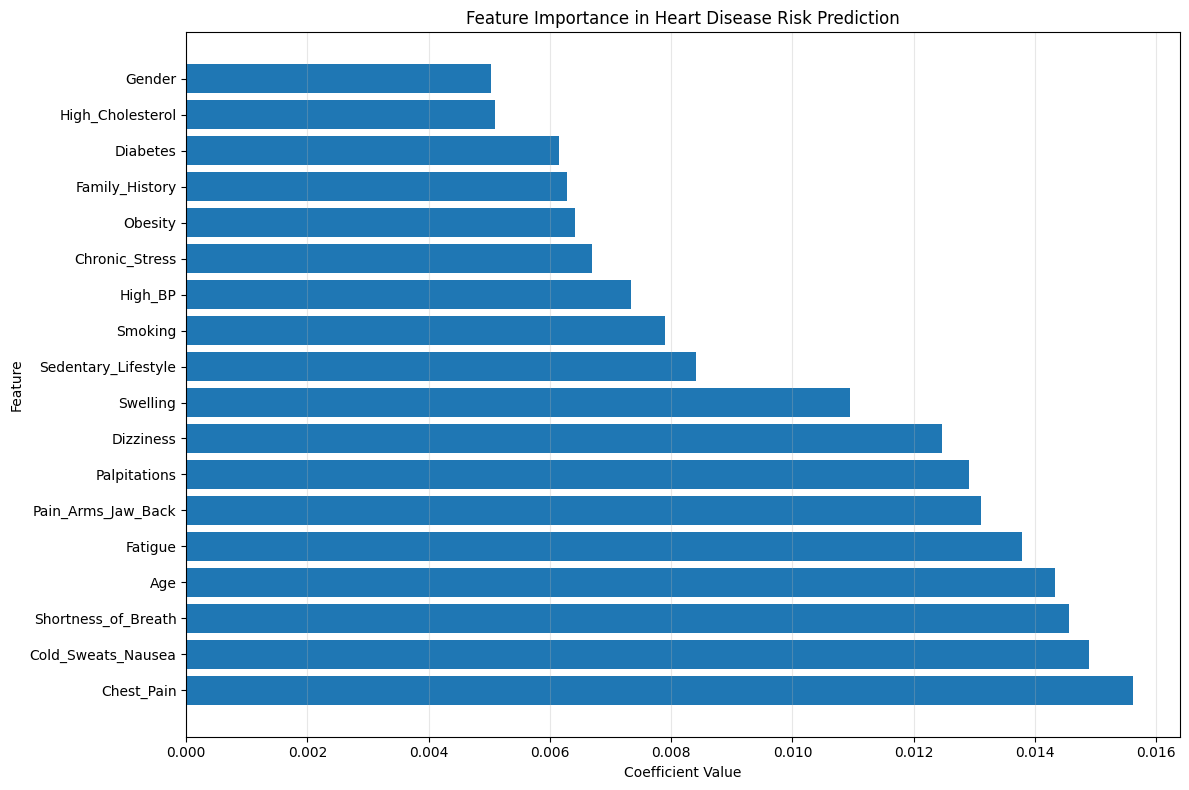

In [10]:
plt.figure(figsize=(12, 8))
plt.barh(coefficients['Feature'], coefficients['Coefficient'])
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Feature Importance in Heart Disease Risk Prediction')
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()

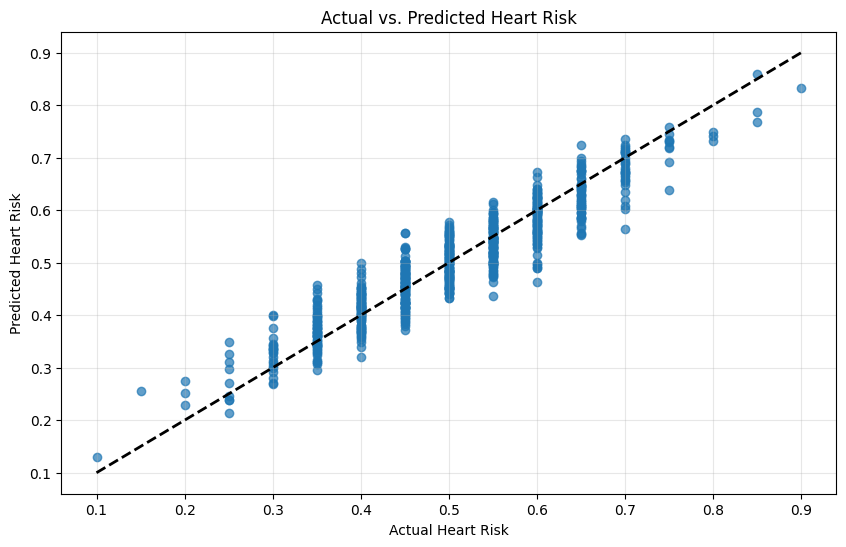

In [11]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_test, alpha=0.7)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('Actual Heart Risk')
plt.ylabel('Predicted Heart Risk')
plt.title('Actual vs. Predicted Heart Risk')
plt.grid(True, alpha=0.3)

In [12]:
correlations = grouped_df[symptoms + risk_factors].corrwith(grouped_df[risk[0]]).sort_values(ascending=False)
print("\nFeature Correlations with Heart Risk:")
print(correlations)


Feature Correlations with Heart Risk:
Cold_Sweats_Nausea     0.607957
Pain_Arms_Jaw_Back     0.607136
Chest_Pain             0.597235
Fatigue                0.595968
Age                    0.589265
Shortness_of_Breath    0.585585
Swelling               0.579705
Dizziness              0.576468
Palpitations           0.572735
Smoking                0.414933
Chronic_Stress         0.405543
Sedentary_Lifestyle    0.403657
Diabetes               0.396476
Family_History         0.394001
High_BP                0.393286
Obesity                0.392133
High_Cholesterol       0.384157
Gender                 0.293362
dtype: float64


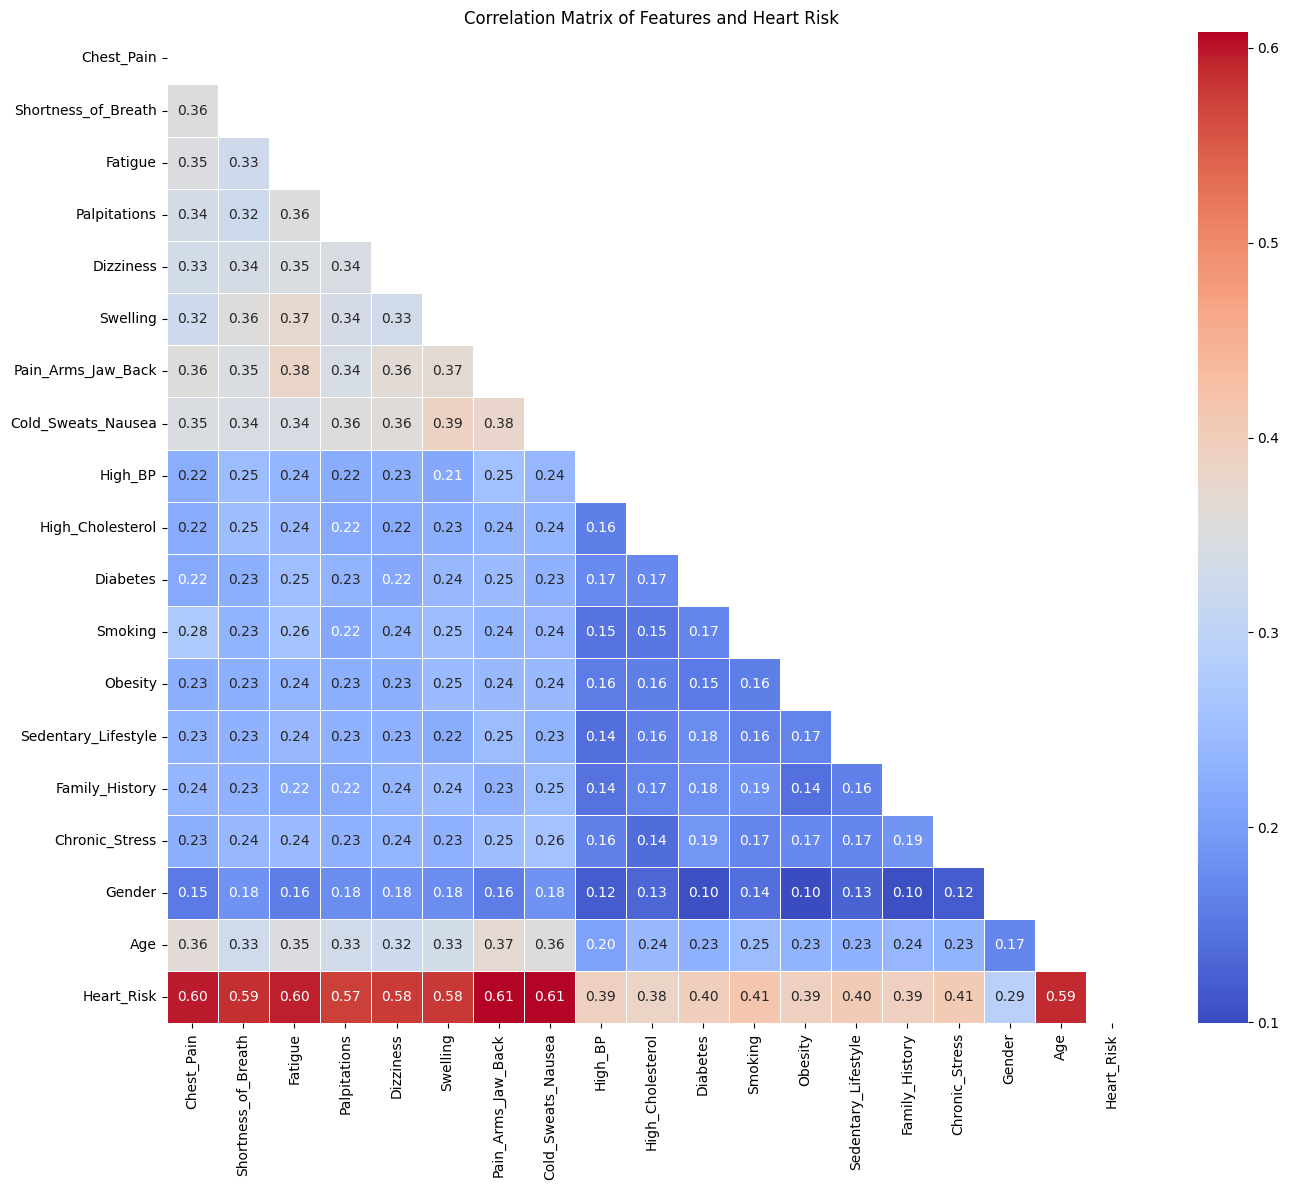

In [13]:
plt.figure(figsize=(14, 12))
corr_matrix = grouped_df[symptoms + risk_factors + risk].corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Features and Heart Risk')
plt.tight_layout()

In [14]:
print("\nComparing Single vs Multiple Linear Regression:")
print(f"Single Variable Model R² (test): {0.8632:.4f}")
print(f"Multiple Variable Model R² (test): {test_r2:.4f}")


Comparing Single vs Multiple Linear Regression:
Single Variable Model R² (test): 0.8632
Multiple Variable Model R² (test): 0.8731
